# Student dataset

Dataset Description

This dataset, titled "Intro to Data Cleaning, EDA, and Machine Learning," is designed to help learners practice essential data science techniques such as data cleaning, exploratory data analysis (EDA), and machine learning. It contains information on students, including their demographic and academic data, such as age, gender, country of origin, study hours, and scores in Python and Database (DB) courses.
The dataset was initially raw and required significant cleaning to handle inconsistencies, missing values, and outliers, providing an excellent opportunity for hands-on data cleaning and preprocessing.
Data Challenges
●	Inconsistencies: Mixed formats in gender, country, and prevEducation fields, such as "Male" vs. "M" or "Rsa" vs. "RSA," leading to unreliable analysis.
●	Missing Values: Incomplete data, particularly in the Python and DB scores, could bias the results.
●	Outliers: Extreme or unrealistic values in performance scores can skew predictions or analyses.

**Import Libraries**

In [32]:
import pandas as pd

**Load dataset**

In [33]:
df = pd.read_csv("D:/E/Courses/Data Science/Digital Egypt Generation/Material/Python/Data Preprocessing and Visualization/Pandas/Pandas Practice Part1/Assignment 19 sep/bi.csv", encoding="latin1")

**Tasks – Data Cleaning, Missing Data, Outliers**

**Part 1 – Data Cleaning**
    
*1.	Check dataset structure*

○	Use df.shape, df.info(), and df.head() to understand the number of rows, columns, and data types.

○	Question: Which columns should be categorical and which should be numerical?


In [34]:
# Dataset structure
print(df.shape)       # Rows, Columns
print(df.info())      # Data types
df.head()

(77, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


The dataset has 77 rows and 11 columns.
- Categorical columns: fNAME, lNAME, gender, country, residence, prevEducation
- Numerical columns: Age, entryEXAM, studyHOURS, Python, DB

----------------------------------------------------------------------------------------------------------------------------

*2.	Detect inconsistent categories*

○	Run df['gender'].unique(), df['country'].unique(), and df['prevEducation'].unique().

○	Find issues such as "Male" vs "M" or "Barrrchelors" vs "Bachelor".

○	Task: Fix them using .replace() or string methods like .str.upper().strip()

In [35]:
print(df['gender'].unique())
print(df['country'].unique())
print(df['prevEducation'].unique())

['Female' 'M' 'Male' 'F' 'female' 'male']
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [36]:
# Fix gender 
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'}).str.title()

# Fix country names 
df['country'] = df['country'].str.strip().str.upper().replace({
    'NORGE': 'NORWAY',
    'RSA': 'SOUTH AFRICA', 
    'Rsa': 'SOUTH AFRICA'
})

# Fix prevEducation
df['prevEducation'] = df['prevEducation'].str.strip().str.title().replace({
    'Highschool': 'High School',
    'Highschool ': 'High School',
    'Barrrchelors': 'Bachelor',
    'Bachelors': 'Bachelor',
    'Diplomaaa' : 'Diploma'
})

In [37]:
print(df['gender'].unique())
print(df['country'].unique())
print(df['prevEducation'].unique())

['Female' 'Male']
['NORWAY' 'KENYA' 'UGANDA' 'SOUTH AFRICA' 'DENMARK' 'NETHERLANDS' 'ITALY'
 'SPAIN' 'UK' 'SOMALI' 'NIGERIA' 'GERMANY' 'FRANCE']
['Masters' 'Diploma' 'High School' 'Bachelor' 'Doctorate']


----------------------------------------------------------------------------------------------------------------------------

3.	Handle duplicates

○	Check for duplicates with df.duplicated().sum().

○	Task: Drop them using df.drop_duplicates().

In [38]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("Number of duplicates after dropping:", duplicates)

Number of duplicates after dropping: 0


----------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------

**Part 2 – Missing Data**

1.	Identify missing values

○	Use df.isnull().sum() to see which columns have missing data.

○	Question: Which columns are most affected by missing values?

In [39]:
print(df.isnull().sum())

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64


Missing values exist mainly in Python.

----------------------------------------------------------------------------------------------------------------------------

2.	Impute missing values

○	*Option 1 (Numerical)*: Fill missing scores in Python or DB using mean or median.

○	*Option 2 (Categorical)*: Fill missing categories in country or gender with mode.

○	*Task*: Try both methods and compare results.

In [40]:
# Fill numerical with mean
df['Python'] = df['Python'].fillna(df['Python'].mean())
print(df.isnull().sum())

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64


No missing values at DB or categories like country or gender to be filled

----------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------

**Part 3 – Outliers**

1.	Detect outliers

○	Use boxplots (sns.boxplot) or summary statistics (df['Python'].describe()).

○	Question: Which values in studyHOURS, Python, or DB look unrealistic?

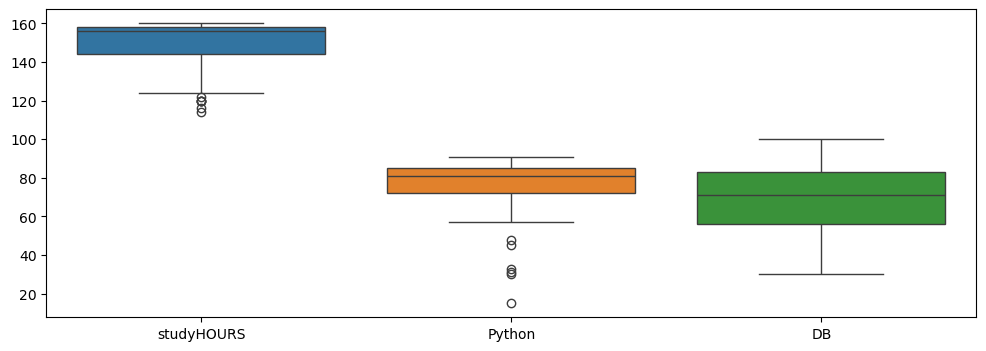

In [41]:
# Detect outliers with boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.boxplot(data=df[['studyHOURS','Python','DB']])
plt.show()

As we see outliers found in studyHOURS and Python, while DB scores had no outliers.

**Explaination of the concept**

What a Boxplot Shows?

Each boxplot summarizes a column’s distribution using five key statistics (from descriptive statistics):

Median (Q2): the middle value → shown as a line inside the box.

Q1 (25th percentile): the lower edge of the box.

Q3 (75th percentile): the upper edge of the box.

IQR (Interquartile Range) = Q3 – Q1 → box height.

Whiskers: extend typically to Q1 - 1.5 X IQR (lower) and Q3 + 1.5 X IQR (upper).

*Any point outside the whiskers is considered an outlier*

---------------------------------------------------------------------------------------------------------------------------------

**2.	Handle outliers**

**○	Option 1: Remove rows where scores are outside a reasonable range (e.g., <0 or >100).**

In [42]:
# Option 1
# Remove rows where entryEXAM, Python or DB scores are outside 0–100
df_option1 = df[(df['Python'].between(0,100)) & (df['DB'].between(0,100)) & (df['entryEXAM'].between(0,100))]

print("Shape after defining range 0-100:", df_option1.shape)


Shape after defining range 0-100: (77, 11)


The dataset still have the same numbers of rows (77) and columns (11), that means all Python/DB/entryEXAM values are already within 0–100, so this option won’t remove any record.

**○	Option 2: Apply IQR method**

The Interquartile Range (IQR) method:

Outlier = value < (Q1 – 1.5×IQR) OR value > (Q3 + 1.5×IQR).

In [43]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['Python'] = cap_outliers_iqr(df['Python'])
df['studyHOURS'] = cap_outliers_iqr(df['studyHOURS'])

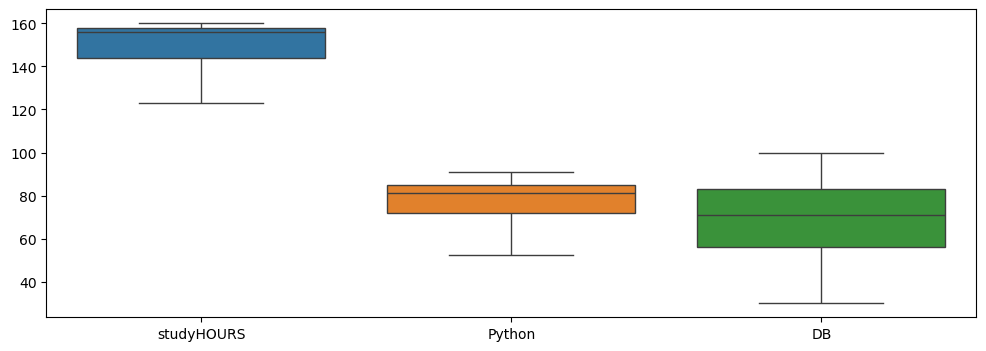

In [44]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df[['studyHOURS','Python','DB']])
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

**Save a cleaned version of the dataset**

In [45]:
df.to_csv("cleaned_students.csv", index=False)
print("Final cleaned dataset saved as cleaned_students.csv")

Final cleaned dataset saved as cleaned_students.csv
